In [1]:
# Repository github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-8
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

In [2]:
import torch
import torch.optim as optim

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

if cuda:
    torch.cuda.manual_seed(1)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True
Tesla T4


In [3]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
!rm packages/* -rf
!rmdir packages
!ls
print("-----------------------------------------")
!mkdir packages
!ls "gdrive/My Drive/Colab Notebooks/S8/packages"

rmdir: failed to remove 'packages': No such file or directory
gdrive	sample_data
-----------------------------------------
augmentation.py  __init__.py  plot.py	  test.py
data.py		 Net.py       summary.py  train.py


In [5]:
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/augmentation.py" packages/augmentation.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/__init__.py" packages/__init__.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/plot.py" packages/plot.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/test.py" packages/test.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/data.py" packages/data.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/Net.py" packages/Net.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/summary.py" packages/summary.py
!cp "gdrive/My Drive/Colab Notebooks/S8/packages/train.py" packages/train.py

In [6]:
gdrivepath="gdrive/My Drive/Colab Notebooks/S8/"

In [7]:
print("Gdrive Colab Dir")
print("----------------")
!ls "gdrive/My Drive/Colab Notebooks/S8"
print("Current Directory")
print("----------------")
!ls
print("----Packages----")
!ls packages

Gdrive Colab Dir
----------------
08_CodeFinal.ipynb  packages  savedmodel
Current Directory
----------------
gdrive	packages  sample_data
----Packages----
augmentation.py  __init__.py  plot.py	  test.py
data.py		 Net.py       summary.py  train.py


In [8]:
import packages

In [10]:
#Creating Transform object to create needed transforms.
trans = packages.CIFAR10_Transforms()

In [11]:
#Creating the data object using the above transforms
#The arguments are the transformations, root_directory (defaulted to './root'), batch_size(=64),
                      #shuffle (=True), num_workers(=4), pin_memory(=True)
data = packages.CIFAR10DataLoader(trans, batch_size= 128)

Extracting ./root/cifar-10-python.tar.gz to ./root
Files already downloaded and verified


In [12]:
#Getting the data loaders from the data object
train_loader, test_loader = data.get_loaders()

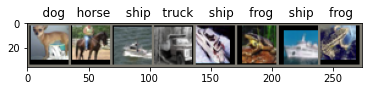

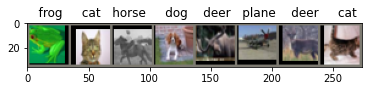

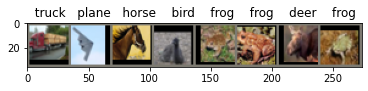

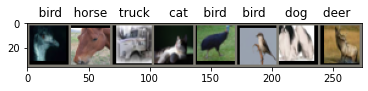

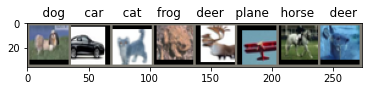

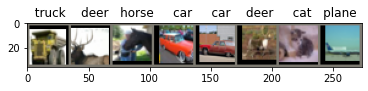

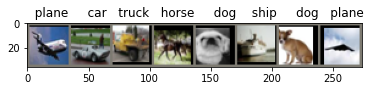

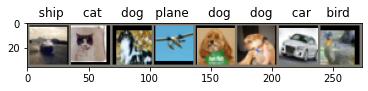

In [13]:
#Displaying random training images from the dataset

packages.display(train_loader, n= 64) #train or test loader, whose images to be displayed, n= no. of images

#The images displayed are after Un-Normalizing the dataset.

In [14]:
#Creating model object, of ResNet18 architecture.
model = packages.ResNet18().to(device) #converting it to CUDA

In [15]:
#Getting model summary

packages.model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [16]:
#Creating optimizer
optimizer = optim.SGD(model.parameters(), lr= 0.001, momentum= 0.9, weight_decay= 1e-5)

In [17]:
#One-Cycle LR
from torch.optim.lr_scheduler import OneCycleLR
scheduler = OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=25)

In [18]:
#Creating Train and Test objects
train = packages.Train(model, device, train_loader, optimizer)
test = packages.Test(model, device, test_loader)

In [19]:
#Training the model.

epochs = 25
for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  train.train(epoch)
  scheduler.step()
  test.test()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=1.222033977508545 Batch_id=390 Accuracy=46.39: 100%|██████████| 391/391 [01:00<00:00,  6.47it/s]



Test set: Average loss: 0.0100, Accuracy: 5642/10000 (56.42%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  2


Loss=0.7828668355941772 Batch_id=390 Accuracy=65.22: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7000/10000 (70.00%)

EPOCH:  3


Loss=0.5728316307067871 Batch_id=390 Accuracy=73.35: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7380/10000 (73.80%)

EPOCH:  4


Loss=0.5195921063423157 Batch_id=390 Accuracy=78.39: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7928/10000 (79.28%)

EPOCH:  5


Loss=0.607893705368042 Batch_id=390 Accuracy=81.39: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7957/10000 (79.57%)

EPOCH:  6


Loss=0.4009389281272888 Batch_id=390 Accuracy=83.23: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8091/10000 (80.91%)

EPOCH:  7


Loss=0.4518887400627136 Batch_id=390 Accuracy=85.12: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8288/10000 (82.88%)

EPOCH:  8


Loss=0.3022935390472412 Batch_id=390 Accuracy=86.41: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8398/10000 (83.98%)

EPOCH:  9


Loss=0.3228156268596649 Batch_id=390 Accuracy=87.78: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8538/10000 (85.38%)

EPOCH:  10


Loss=0.39966973662376404 Batch_id=390 Accuracy=88.50: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8497/10000 (84.97%)

EPOCH:  11


Loss=0.2992002069950104 Batch_id=390 Accuracy=89.42: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8517/10000 (85.17%)

EPOCH:  12


Loss=0.3934958875179291 Batch_id=390 Accuracy=90.19: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]



Test set: Average loss: 0.0031, Accuracy: 8699/10000 (86.99%)

EPOCH:  13


Loss=0.25397056341171265 Batch_id=390 Accuracy=90.58: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8604/10000 (86.04%)

EPOCH:  14


Loss=0.15025785565376282 Batch_id=390 Accuracy=91.59: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8634/10000 (86.34%)

EPOCH:  15


Loss=0.1599772423505783 Batch_id=390 Accuracy=91.86: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8709/10000 (87.09%)

EPOCH:  16


Loss=0.182668998837471 Batch_id=390 Accuracy=92.40: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8736/10000 (87.36%)

EPOCH:  17


Loss=0.3758777976036072 Batch_id=390 Accuracy=93.06: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8805/10000 (88.05%)

EPOCH:  18


Loss=0.33654069900512695 Batch_id=390 Accuracy=93.45: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8887/10000 (88.87%)

EPOCH:  19


Loss=0.209413081407547 Batch_id=390 Accuracy=93.82: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8698/10000 (86.98%)

EPOCH:  20


Loss=0.21332304179668427 Batch_id=390 Accuracy=93.93: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8778/10000 (87.78%)

EPOCH:  21


Loss=0.2506687045097351 Batch_id=390 Accuracy=94.52: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8854/10000 (88.54%)

EPOCH:  22


Loss=0.30835750699043274 Batch_id=390 Accuracy=94.69: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8868/10000 (88.68%)

EPOCH:  23


Loss=0.2865745425224304 Batch_id=390 Accuracy=95.06: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8908/10000 (89.08%)

EPOCH:  24


Loss=0.12639398872852325 Batch_id=390 Accuracy=95.20: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8876/10000 (88.76%)

EPOCH:  25


Loss=0.10070345550775528 Batch_id=390 Accuracy=95.66: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]



Test set: Average loss: 0.0031, Accuracy: 8886/10000 (88.86%)



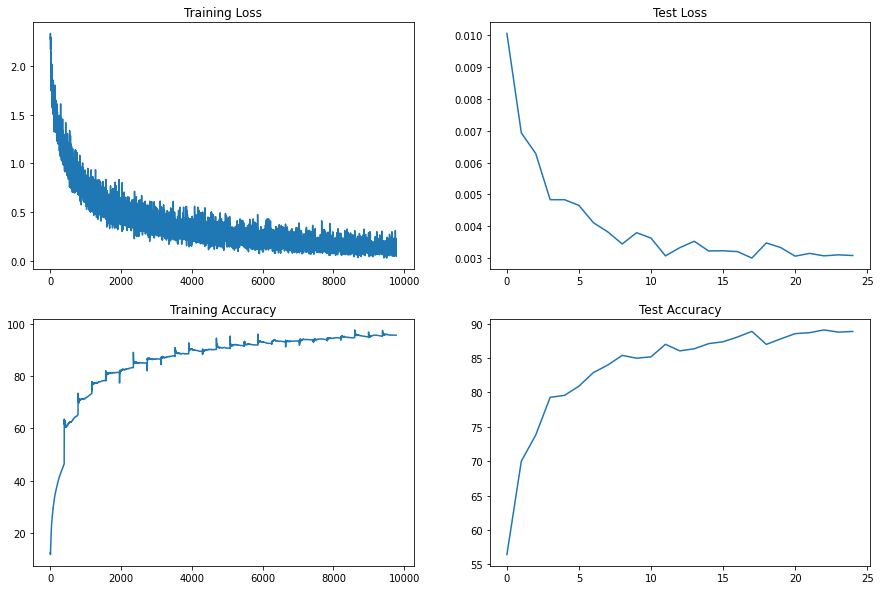

In [20]:
#Plotting overall Trainings and Test Loss/Accuracy along iterations/epochs
packages.graph(train, test)

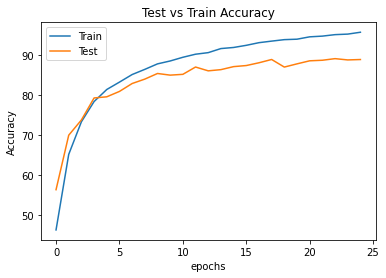

In [21]:
#Plotting overall Training Accuracy vs Test Accuracy along epochs
packages.testvtrain(train, test)

In [22]:
#Loading the best model, to generate model results
best_model = packages.ResNet18().to(device)
best_model.load_state_dict(torch.load(gdrivepath+'savedmodel/classifier.pt')) #Loading the best saved model from above training.
best_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=


Test set: Average loss: -15.1003, Accuracy: 8908/10000 (89.08%)

torch.Size([1092, 3, 32, 32])


<Figure size 432x288 with 0 Axes>

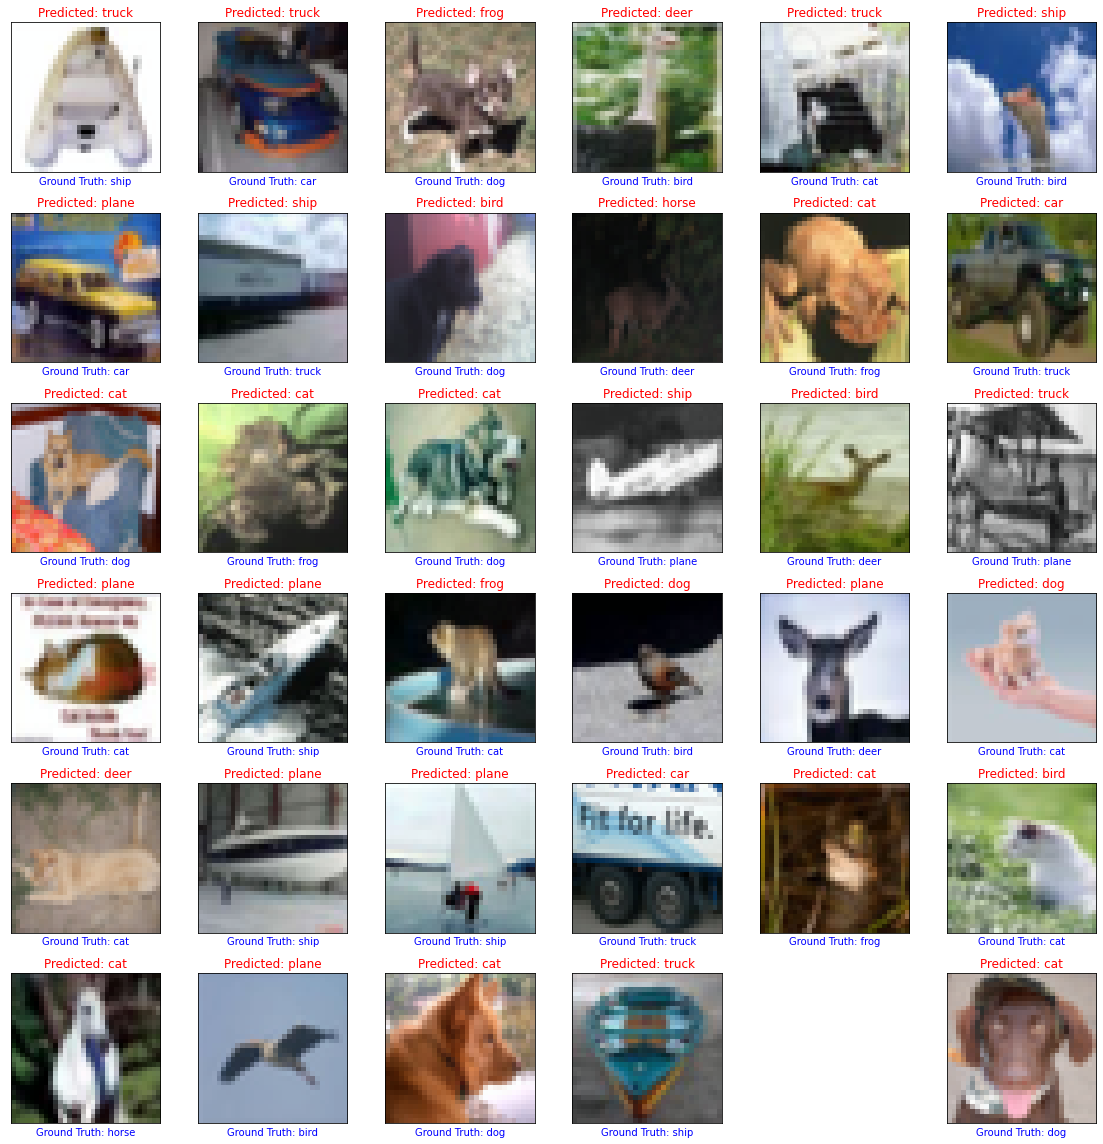

In [23]:
#Creating random 36 mis classified images from the best model
packages.mis(best_model, device, test_loader, 36)

In [24]:
#Class wise accuracies from the best model.
packages.class_acc(best_model, device, test_loader)

Accuracy of plane : 87 %
Accuracy of   car : 95 %
Accuracy of  bird : 80 %
Accuracy of   cat : 80 %
Accuracy of  deer : 92 %
Accuracy of   dog : 85 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 91 %
Accuracy of truck : 94 %
